"I, Tarik Kalwar, did not use ChatGPT or any other AI/LLM to assist me on this assessment"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Create a Jupyter notebook and name it <firstname_gourds>. For example, John Smith's notebook would be named john_gourds.ipynb

2. Read in the gourds data into a DataFrame named gourds and look at the top 5 rows

In [5]:
gourds = pd.read_csv("C:/Users/user/Desktop/Cohort10/Python/Python Final/python-assessment-Tarikwk/gourds.csv")
gourds.head(5)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk
0,2013,F,154.5 lb,1.0,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,NaN,154.5
1,2013,F,146.5 lb,2.0,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NaN,194.0,151.0,NaN,146.5
2,2013,F,145.0 lb,3.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,NaN,145.0
3,2013,F,140.8 lb,4.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,NaN,140.8
4,2013,F,139.0 lb,5.5,"Barlow, John",NaN,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,0.0,0.0,NaN,139.0


3a. Which country shows up the most frequently in the dataset? 

In [7]:
most_country = gourds.country.value_counts().reset_index()
most_country = most_country.head(5)
most_country

,country,count
0,United States,17070
1,Canada,4522
2,Germany,2175
3,Italy,846
4,Austria,602


3b. Create a visualization (your choice) to show the frequency of appearances for the top 5 countries in terms of number of appearances.

C:\Users\user\AppData\Local\Temp\ipykernel_4664\433538057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='count', data = most_country, palette ='plasma')


<Axes: xlabel='country', ylabel='count'>

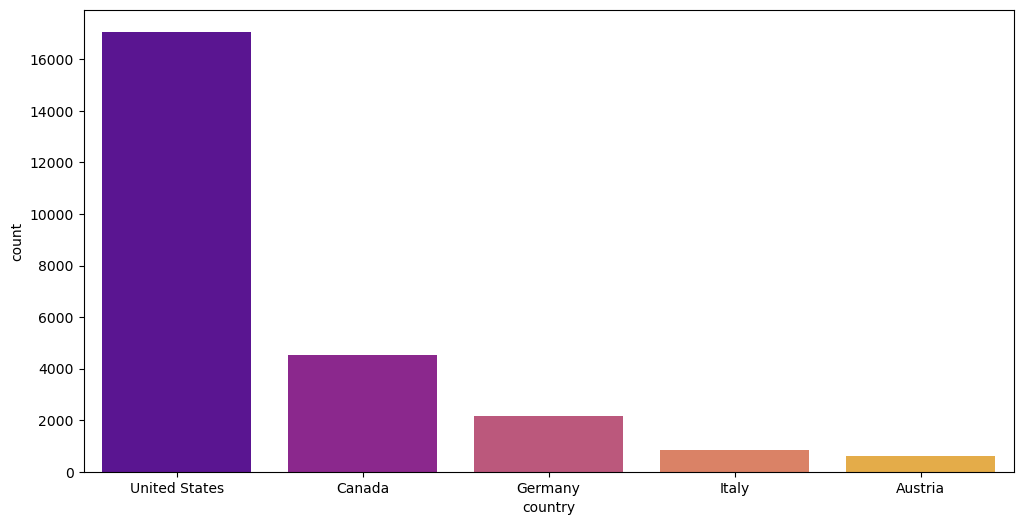

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data = most_country, palette ='plasma')

4a. The weight column currently contains a unit ("in" for Long Gourds and "lb" for every other type). 
    Remove the unit from this so that you just have the numeric value. 

In [11]:
gourds['weight']#.reset_index()

0        154.5 lb
1        146.5 lb
2        145.0 lb
3        140.8 lb
4        139.0 lb
           ...   
28006    181.0 lb
28007    159.5 lb
28008    141.0 lb
28009    116.5 lb
28010     16.3 lb
Name: weight, Length: 28011, dtype: object

In [12]:
gourds['weight'] = gourds['weight'].str.replace('lb', '', regex=False) 
gourds['weight'] = gourds['weight'].str.replace('in', '', regex=False) 

4b. Save the result back to the weight column.

In [14]:
#gourds.loc[gourds.grower_name == 'Bowman, Ross']
#trying to figure out why I'm not getting the max weight

4c. Sort the values on the weight column. (Heaviest gourd should weigh 2702.9lbs)
If you cannot find a solution for this question, you can use the weight_bk to answer the questions below that rely on it.

In [16]:
gourds.sort_values('weight', ascending = False).head(1)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk
20110,2019,P,999.8,556.0,"Verbraeken, alois",Rijkevorsel,Antwerp,Belgium,Belgisch Kampioenschap pompoenwegen,"1867,3Biermans2018","1867,3Biermans2018",350.0,982.0,NaN,999.8


In [17]:
gourds['weight']

0        154.5 
1        146.5 
2        145.0 
3        140.8 
4        139.0 
          ...  
28006    181.0 
28007    159.5 
28008    141.0 
28009    116.5 
28010     16.3 
Name: weight, Length: 28011, dtype: object

In [18]:
#gourds['weight'] = gourds['weight'].astype(int)
#tried to change to integer and got this error 'ValueError: invalid literal for int() with base 10: '154.5 '
#researched the issue. might be because of extra white spaces?

In [19]:
str_cols = gourds.select_dtypes(include='object').columns

In [20]:
for col in str_cols:
    gourds[col] = gourds[col].astype(str).apply(lambda x: ' '.join(x.split()))

In [21]:
gourds.columns = gourds.columns.str.strip()

In [22]:
#gourds['weight'] = gourds['weight'].astype(int)
#ran again and still  got this error 'ValueError: invalid literal for int() with base 10: '154.5 '

In [23]:
#may come back to this after I get through a few more. 

In [24]:
gourds.sort_values('weight_bk', ascending = False).head(1)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk
25730,2021,P,2702.9,1.0,"Cutrupi, Stefano",Radda in Chianti,Tuscany,Italy,Campionato dello Zuccone,1885.5 Werner,Self,514.0,2553.0,nan,2702.9


5.Create a line plot showing the trend in the heaviest gourd by year. What do you notice?

<Axes: xlabel='year', ylabel='weight_bk'>

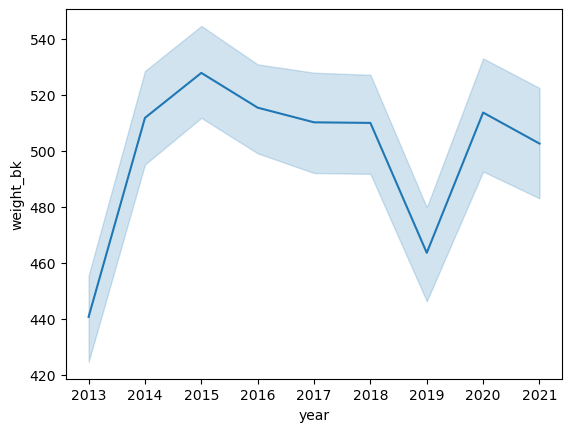

In [26]:
sns.lineplot(x='year', y='weight_bk', data = gourds)
#doesnt look right. values for weight_bk are inncorect? is it by avg? 

In [27]:
#weightbk = gourds[['year', 'weight_bk']]

In [28]:
#weightbk.sort_values('weight_bk', ascending = False)

In [29]:
#weightbk.describe()

In [30]:
#line plot is by average  

To answer number 5: 2015 was a banner year for the gourd, however 2019 fell into a slump. 
This could be for a number of factors (weather comes to mind)
                                                                                                    

6a. Read the type_name.csv dataset into a new DataFrame named type_name.

In [33]:
type_name = pd.read_csv("C:/Users/user/Desktop/Cohort10/Python/Python Final/python-assessment-Tarikwk/type_name.csv")

6b. Merge this with gourds to add on type_name column.

In [35]:
type_name

,type_id,type_name
0,F,Field Pumpkin
1,P,Giant Pumpkin
2,S,Giant Squash
3,W,Giant Watermelon
4,T,Tomato
5,L,Long Gourd


In [36]:
gourds = gourds.merge(type_name, on='type_id', how ='left')
gourds.head(1)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name
0,2013,F,154.5,1.0,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,nan,154.5,Field Pumpkin


6c. Which type of gourd is heaviest on average?

In [38]:
heavest_gourd = gourds.groupby('type_name')['weight_bk'].mean()
heavest_gourd
#Giant Pumpkin 

type_name
Field Pumpkin        79.456309
Giant Pumpkin       776.033885
Giant Squash        527.298348
Giant Watermelon    127.149110
Long Gourd           94.567945
Tomato                3.176921
Name: weight_bk, dtype: float64

6d. Create a visualization showing the distribution of gourd weights by type.

<Axes: xlabel='type_name', ylabel='weight_bk'>

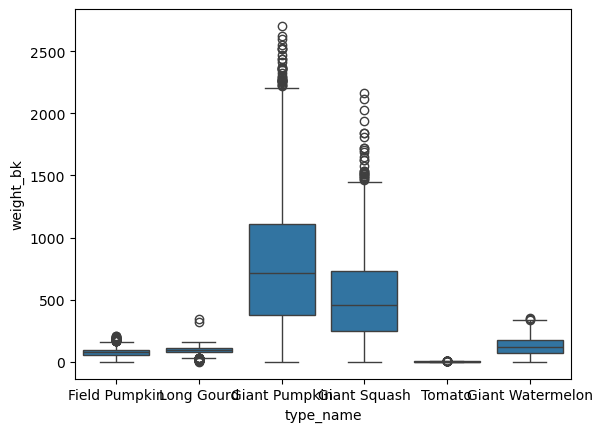

In [40]:
sns.boxplot(x='type_name', y='weight_bk', data = gourds)

7a. Create a new column weight_error that contains the amount by which the estimated weight exceeded the actual weight. 

In [42]:
gourds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28011 entries, 0 to 28010
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               28011 non-null  int64  
 1   type_id            28011 non-null  object 
 2   weight             28011 non-null  object 
 3   place              28011 non-null  float64
 4   grower_name        28011 non-null  object 
 5   city               28011 non-null  object 
 6   state_prov         28011 non-null  object 
 7   country            28011 non-null  object 
 8   gpc_site           28011 non-null  object 
 9   seed_mother        28011 non-null  object 
 10  pollinator_father  28011 non-null  object 
 11  ott                24854 non-null  float64
 12  est_weight         24854 non-null  float64
 13  variety            28011 non-null  object 
 14  weight_bk          28011 non-null  float64
 15  type_name          28011 non-null  object 
dtypes: float64(4), int64(1

In [43]:
gourds['weight'] = pd.to_numeric(gourds['weight'], errors='coerce')
gourds['est_weight'] = pd.to_numeric(gourds['est_weight'], errors='coerce')

In [44]:
gourds['weight_error'] = gourds['weight'] - gourds['est_weight']

In [45]:
gourds.head(1)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
0,2013,F,154.5,1.0,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,nan,154.5,Field Pumpkin,25.5


7b. What is the worst overestimate of a gourd weight?

In [47]:
gourds.sort_values('weight_error', ascending = False).head(1)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
19588,2019,P,2158.0,11.0,"Geddes, Steve",Boscawen,New Hampshire,United States,Deerfield Fair,1852 Vander Wielen,2004 Vander Wielen,0.0,0.0,nan,2158.0,Giant Pumpkin,2158.0


In [48]:
worst_over = gourds[(gourds['weight'] != 0.0) & (gourds['est_weight'] != 0.0)]
worst_over.sort_values('weight_error', ascending = False).head(1)
#ANSWER: 1169.4

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
3629,2014,P,1339.4,236.0,"Sundin, Eric",Stoney Creek,Ontario,Canada,Port Elgin Pumpkinfest,702 Sundin,1442 Metesa,194.0,170.0,nan,1339.4,Giant Pumpkin,1169.4


In [49]:
#worst over estimate is 1169.4
#worst over was caluclated by removing 0.0 from both weight and estimated weight  

7c. What percentage of gourd weights are overestimated?

In [51]:
worst_over['weight_error'] = pd.to_numeric(worst_over['weight_error'], errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_4664\343981795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worst_over['weight_error'] = pd.to_numeric(worst_over['weight_error'], errors='coerce')


In [52]:
total_over = (worst_over['weight_error'] > 0).sum()
total_over

8495

In [53]:
count_of_worst_over = len(worst_over)
count_of_worst_over

20216

In [54]:
percent_overestimated = (total_over / count_of_worst_over) * 100
percent_overestimated

42.0211713494262

8. Create a visualization to compare the estimated weight (est_weight) to the actual weight (weight_lbs).  Note that both of these columns are numeric, so choose a type of visualization most appropriate for these data types. What do you notice from your visualization?

In [56]:
gourds = gourds[(gourds['weight_bk'] != 0.0) & (gourds['est_weight'] != 0.0)]
#removed the 0 values from weight and estimated weight 

In [57]:
gourds = gourds[(gourds['weight_bk'] <= 3000.0) & (gourds['est_weight'] <= 3000.0)]
#after I tried to make my visualization i realized there were values for 10000...so i filtered out anything greater than 3000

<Axes: xlabel='est_weight', ylabel='weight_bk'>

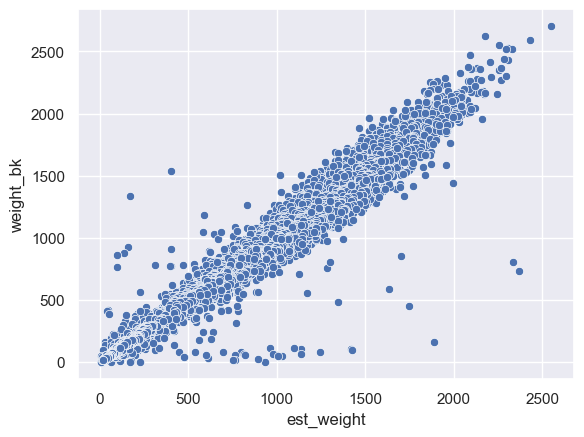

In [58]:
sns.set_theme(style="darkgrid")
sns.scatterplot(x="est_weight", y="weight_bk", data=gourds)
#looks like they are accurate within reason, however there are several outlyers 

9a. Which grower has top 10 finishes across the largest number of types of gourds?

In [60]:
top_grower = gourds.place.value_counts().to_frame().reset_index()['place'] 

In [61]:
top_grower

0         1.0
1         2.0
2         6.0
3         7.0
4        12.0
        ...  
3203    663.5
3204    661.5
3205    546.5
3206    495.5
3207    156.5
Name: place, Length: 3208, dtype: float64

In [62]:
gourds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17057 entries, 0 to 28009
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               17057 non-null  int64  
 1   type_id            17057 non-null  object 
 2   weight             17057 non-null  float64
 3   place              17057 non-null  float64
 4   grower_name        17057 non-null  object 
 5   city               17057 non-null  object 
 6   state_prov         17057 non-null  object 
 7   country            17057 non-null  object 
 8   gpc_site           17057 non-null  object 
 9   seed_mother        17057 non-null  object 
 10  pollinator_father  17057 non-null  object 
 11  ott                17057 non-null  float64
 12  est_weight         17057 non-null  float64
 13  variety            17057 non-null  object 
 14  weight_bk          17057 non-null  float64
 15  type_name          17057 non-null  object 
 16  weight_error       17057 no

In [63]:
top_growers = gourds[gourds['place'].between(1, 10, inclusive="both")]
top_growers.head(5)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
0,2013,F,154.5,1.0,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,nan,154.5,Field Pumpkin,25.5
1,2013,F,146.5,2.0,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,nan,194.0,151.0,nan,146.5,Field Pumpkin,-4.5
2,2013,F,145.0,3.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,nan,145.0,Field Pumpkin,30.0
3,2013,F,140.8,4.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,nan,140.8,Field Pumpkin,-10.2
5,2013,F,139.0,5.5,"Werner, Quinn",Saegartown,Pennsylvania,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,209 Werner,nan,190.0,141.0,nan,139.0,Field Pumpkin,-2.0


In [64]:
top_grower = top_growers.groupby("grower_name")["type_name"].nunique().reset_index()

In [65]:
top_grower.sort_values('type_name', ascending = False).head(1)

,grower_name,type_name
78,"Martin, Margaret & Glen",2


9b. What is this grower's best finish that shows up in the dataset?

In [67]:
name = 'Martin, Margaret & Glen'
best_finish = gourds[gourds['grower_name'] == name]
best_finish.head()

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
3,2013,F,140.8,4.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,nan,140.8,Field Pumpkin,-10.2
19,2013,F,128.0,19.5,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Mishicot Pumpkin Fest,109 Martin,open,194.0,151.0,nan,128.0,Field Pumpkin,-23.0
607,2013,P,1338.0,116.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Mishicot Pumpkin Fest,1872 Wallace,220.3 DeBacco,390.0,1270.0,nan,1338.0,Giant Pumpkin,68.0
973,2013,P,888.4,497.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,"1,250 Martin '12",220.3 De Bacco,357.0,1002.0,nan,888.4,Giant Pumpkin,-113.6
1188,2013,P,706.0,716.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Mishicot Pumpkin Fest,1788.5 Delatas,1872 Wallace,315.0,700.0,nan,706.0,Giant Pumpkin,6.0


In [68]:
best_finish.sort_values('place', ascending = True).head(1)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
3,2013,F,140.8,4.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,nan,140.8,Field Pumpkin,-10.2


In [69]:
#4th!!!!

10. The seed_mother and pollinator_father give information on the parents for each gourd.

10a. How many gourds appear in the seed_mother column at least 100 times?

In [72]:
str_cols = gourds.select_dtypes(include='object').columns
for col in str_cols:
    gourds[col] = gourds[col].astype(str).apply(lambda x: ' '.join(x.split()))

In [73]:
gourds = gourds[~gourds["seed_mother"].str.lower().isin(["unknown", "unkown", "unknow"])]

In [74]:
gourds.head()

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
0,2013,F,154.5,1.0,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.0,nan,154.5,Field Pumpkin,25.5
1,2013,F,146.5,2.0,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,nan,194.0,151.0,nan,146.5,Field Pumpkin,-4.5
2,2013,F,145.0,3.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,nan,145.0,Field Pumpkin,30.0
3,2013,F,140.8,4.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.0,nan,140.8,Field Pumpkin,-10.2
5,2013,F,139.0,5.5,"Werner, Quinn",Saegartown,Pennsylvania,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,209 Werner,nan,190.0,141.0,nan,139.0,Field Pumpkin,-2.0


In [75]:
gourds["seed_mother"] = gourds["seed_mother"].str.replace(r"\s*'\d{2}$", "", regex=True)

In [76]:
gourds['seed_mother'].nunique() 

7135

In [77]:
gourds['seed_mother'].value_counts()

seed_mother
nan               3325
2145 McMullen      124
2009 Wallace       101
1985 Miller         86
1911 Urena          70
                  ... 
1183 Bollinger       1
1119                 1
1128.8 Mahr 14       1
2096                 1
305 Vial             1
Name: count, Length: 7135, dtype: int64

In [78]:
gourds = gourds[gourds["seed_mother"].str.lower() != "nan"]

In [79]:
mother = gourds['seed_mother'].value_counts().reset_index()
mother

,seed_mother,count
0,2145 McMullen,124
1,2009 Wallace,101
2,1985 Miller,86
3,1911 Urena,70
4,2363 Holland,60
...,...,...
7129,1183 Bollinger,1
7130,1119,1
7131,1128.8 Mahr 14,1
7132,2096,1


10a Answer : 2145 McmMullen and 2009 Wallace 

10b. How many gourds appear in the pollinator_father column at least 100 times?

In [82]:
gourds = gourds[~gourds["pollinator_father"].str.lower().isin(["unknown", "unkown", "unknow"])]

In [83]:
gourds["pollinator_father"] = gourds["pollinator_father"].str.replace(r"\s*'\d{2}$", "", regex=True)

In [84]:
gourds['pollinator_father'].nunique() 

3747

In [85]:
gourds['pollinator_father'].value_counts()

pollinator_father
Self               1423
self               1420
open               1213
Open                956
nan                 839
                   ... 
1046 mclaughlin       1
854 Tovar             1
1571 Parks            1
Johnson 1749          1
332 Mudd              1
Name: count, Length: 3747, dtype: int64

In [86]:
gourds = gourds[~gourds["pollinator_father"].str.lower().isin(["Self", "self", "open", "Open", "nan"])]

In [87]:
father = gourds['pollinator_father'].value_counts().reset_index()
father

,pollinator_father,count
0,2009 Wallace,139
1,2145 McMullen,117
2,1985 Miller,66
3,1911 Urena,61
4,sib,57
...,...,...
3734,1734.5 Clementz (15),1
3735,1518 kline,1
3736,1696 Kaminski,1
3737,1521 cutrupi,1


10b Answer : 2009 Wallace and 2145 Mcmullen

10c. How many gourds have at least 100 offspring that have appeared in the GPC Weighoff?

In [90]:
father = father.rename(columns={'pollinator_father': 'seed_mother'})

In [167]:
merged_parents = pd.merge(mother, father, on='seed_mother', how='inner')
merged_parents.head(10)

,seed_mother,count_x,count_y
0,2145 McMullen,124,117
1,2009 Wallace,101,139
2,1985 Miller,86,66
3,1911 Urena,70,61
4,2363 Holland,60,53
5,2008 Neptune,57,37
6,1495 Stelts,52,45
7,2032 Mathison,42,55
8,2230 Wallace,38,39
9,1317 Clementz,37,32


In [92]:
#mother = mother.rename(columns={'count': 'mothers'})

In [93]:
#father = father.rename(columns={'count': 'fathers'})

In [94]:
#parents = pd.concat([mother, father],axis=1)
#parents

10c how many gourds appear at least 100 times between the seed_mother and pollinator_father columns combined?

In [96]:
gourds.head(5)

,year,type_id,weight,place,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,variety,weight_bk,type_name,weight_error
2,2013,F,145.0,3.0,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.0,nan,145.0,Field Pumpkin,30.0
3,2013,F,140.8,4.0,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin,209 Werner,194.0,151.0,nan,140.8,Field Pumpkin,-10.2
7,2013,F,136.0,9.0,"Werner, Quinn",Saegertown,Pennsylvania,United States,Operation Pumpkin,"209,B Werner",150.5 Razo,182.0,124.0,nan,136.0,Field Pumpkin,12.0
11,2013,F,131.0,13.0,"MacKinnon, John",Strathlorne,Nova Scotia,Canada,Joe King Memorial Giant Pumpkin Weigh-off,110 MacKinnon,103 MacKinnon,177.0,115.0,nan,131.0,Field Pumpkin,16.0
12,2013,F,130.5,14.0,"Werner, Quinn",Saegertown,Pennsylvania,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,209 Werner,150.5 Razo,182.0,125.0,nan,130.5,Field Pumpkin,5.5
